In [1]:
import pandas as pd
data = pd.read_csv("clean_PISA.csv")
clusters = {}

# Plan - cluster analysis 
1.  PISA: 15-year-olds by mathematics proficiency level (%).
2.  PISA: 15-year-olds by reading proficiency level (%). 
3. PISA: Distribution of Mathematics Scores
4. PISA: Distribution of Mathematics Scores:
5. PISA: Distribution of Reading Score
6. PISA: Distribution of Science Scores: 
7. PISA: Female 15-year-olds by mathematics proficiency level (%)
8. 'PISA: Female 15-year-olds by science proficiency level (%). 
9. 'PISA: Male 15-year-olds by mathematics proficiency level (%).
10. 'PISA: Male 15-year-olds by reading proficiency level (%).
11. 'PISA: Male 15-year-olds by science proficiency level (%). 
12. 'PISA: Mean performance on the mathematics scale',
13. 'PISA: Mean performance on the mathematics scale. Female',
14. 'PISA: Mean performance on the mathematics scale. Male',
15. 'PISA: Mean performance on the reading scale',
16. 'PISA: Mean performance on the reading scale. Female',
17. PISA: Mean performance on the reading scale. Male',
18. 'PISA: Mean performance on the science scale',
19. 'PISA: Mean performance on the science scale. Female',
20. 'PISA: Mean performance on the science scale. Male',
21. 'PISA: 15-year-olds by science proficiency level (%).
22. 'PISA: Female 15-year-olds by science proficiency level (%). 
23. PISA: Male 15-year-olds by science proficiency level (%).


Also we can do some gender specific analysis

## 1.  PISA: 15-year-olds by mathematics proficiency level (%).

In [2]:
import numpy as np
need = []
for row in data["Indicator Name"].unique():
    if "PISA: 15-year-olds by mathematics proficiency level" in row:
        need.append(row)
        
to_cluster = data[data["Indicator Name"].isin(need)]

r = []    
for row in to_cluster["Country Name"].unique():
    df = to_cluster[to_cluster["Country Name"] == row][["2006","2009","2012","2015"]]
    df.index =["Below lvl 1", "Lvl1", "Lvl2", "Lvl3", "Lvl4", "Lvl5", "Lvl6"]
    df_out = df.stack()
    df_out.index = df_out.index.map('{0[1]}_{0[0]}'.format)
    df = df_out.to_frame().T
    df["Country"] = row
    r.append(df)
    
y = pd.concat(r)



X = y.drop('Country', 1)
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
r = cluster.fit_predict(X)  
diction = {}
for t in range (0,len(r)):
    group = r[t]
    country = y["Country"].unique()[t]
    if group not in diction:
        diction[group] = [country]
    else:
        diction[group].append(country)
clusters["15-year-olds by mathematics proficiency level"] =diction


# 2. mean performance mathematics,  reading, science

In [3]:
data["Indicator Name"].unique()

to_cluster = data[data["Indicator Name"].isin(['PISA: Mean performance on the mathematics scale','PISA: Mean performance on the reading scale','PISA: Mean performance on the science scale'])]
frames = []

r = []    
for row in to_cluster["Country Name"].unique():
    df = to_cluster[to_cluster["Country Name"] == row][["2006","2009","2012","2015"]]
    try:
        df.index =["Maths", "Reading", "Science"]
        df_out = df.stack()
        df_out.index = df_out.index.map('{0[1]}_{0[0]}'.format)
        df = df_out.to_frame().T
        df["Country"] = row
        r.append(df)  
    except: #US
        pass
y = pd.concat(r)
X = y.drop('Country', 1)

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
r = cluster.fit_predict(X)  
diction = {}
for t in range (0,len(r)):
    group = r[t]
    country = y["Country"].unique()[t]
    if group not in diction:
        diction[group] = [country]
    else:
        diction[group].append(country)
clusters["Maths-Science-Reading"] = diction

# 3. 15-year-olds by reading proficiency level (%).

In [4]:
need = []
for row in data["Indicator Name"].unique():
    if "PISA: 15-year-olds by reading proficiency level (%)." in row:
        need.append(row)
        
to_cluster = data[data["Indicator Name"].isin(need)]
frames = []

r = []    
for row in to_cluster["Country Name"].unique():
    df = to_cluster[to_cluster["Country Name"] == row][["2006","2009","2012","2015"]]

    try:
        df.index =["1A","2","3","4","5","6"]
        df_out = df.stack()
        df_out.index = df_out.index.map('{0[1]}_{0[0]}'.format)
        df = df_out.to_frame().T
        df["Country"] = row
        r.append(df)  
    except:
        #Everything worked
        pass
y = pd.concat(r)
X = y.drop('Country', 1)
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
r = cluster.fit_predict(X)  
diction = {}
for t in range (0,len(r)):
    group = r[t]
    country = y["Country"].unique()[t]
    if group not in diction:
        diction[group] = [country]
    else:
        diction[group].append(country)
clusters["15-year-olds by reading proficiency level"] = diction


#  4. 15-year olds by science proficency level (%)

In [5]:
need = []
for row in data["Indicator Name"].unique():
    if "PISA: 15-year-olds by science proficiency" in row:
        need.append(row)
to_cluster = data[data["Indicator Name"].isin(need)]
frames = []

r = []    
for row in to_cluster["Country Name"].unique():
    df = to_cluster[to_cluster["Country Name"] == row][["2006","2009","2012","2015"]]

    try:
        df.index =["1A","2","3","4","5","6","Below Level 1B","Level 1B"]
        df_out = df.stack()
        df_out.index = df_out.index.map('{0[1]}_{0[0]}'.format)
        df = df_out.to_frame().T
        df["Country"] = row
        r.append(df)  
    except:
        #Argentina out
        pass
    
y = pd.concat(r)
X = y.drop('Country', 1)
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
r = cluster.fit_predict(X)  
diction = {}
for t in range (0,len(r)):
    group = r[t]
    country = y["Country"].unique()[t]
    if group not in diction:
        diction[group] = [country]
    else:
        diction[group].append(country)
clusters["15-year-olds by science proficiency level"] = diction

In [6]:
for row in clusters:
    diction = clusters[row]
    dat = {}
    for row in diction:
        for t in diction[row]:
            dat[t] = row
    s = pd.Series(dat, name='group')
    s.index.name = 'Country'
    d = s.reset_index()
    print(d)
    print("----------")
    


                 Country  group
0              Argentina      0
1                 Brazil      0
2               Colombia      0
3              Indonesia      0
4                 Jordan      0
5                  Qatar      0
6                Tunisia      0
7              Australia      4
8                Austria      4
9         Czech Republic      4
10               Denmark      4
11               Estonia      4
12                France      4
13               Iceland      4
14               Ireland      4
15           New Zealand      4
16                Norway      4
17                Poland      4
18              Slovenia      4
19                Sweden      4
20        United Kingdom      4
21               Belgium      3
22                Canada      3
23               Finland      3
24               Germany      3
25  Hong Kong SAR, China      3
26                 Japan      3
27           Korea, Rep.      3
28      Macao SAR, China      3
29           Netherlands      3
30      

# 1.  With PCA 

In [76]:
from sklearn.decomposition import PCA
need = []
for row in data["Indicator Name"].unique():
    if "PISA: 15-year-olds by mathematics proficiency level" in row:
        need.append(row)
        
to_cluster = data[data["Indicator Name"].isin(need)]

r = []    
for row in to_cluster["Country Name"].unique():
    df = to_cluster[to_cluster["Country Name"] == row][["2006","2009","2012","2015"]]
    df.index =["Below lvl 1", "Lvl1", "Lvl2", "Lvl3", "Lvl4", "Lvl5", "Lvl6"]
    df_out = df.stack()
    df_out.index = df_out.index.map('{0[1]}_{0[0]}'.format)
    df = df_out.to_frame().T
    df["Country"] = row
    r.append(df)
    
y = pd.concat(r)

df_pca = pd.DataFrame(PCA(n_components = 5).fit_transform(y.iloc[:,:-1]))
df_pca.reset_index(inplace = True)
y.reset_index(inplace = True)
df_pca["id"] =y["Country"]

In [77]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
#r = cluster.fit_predict(X)  
r = cluster.fit_predict(df_pca.iloc[:,:-1])
datR_1 = pd.DataFrame({"Country":df_pca["id"],"Label":r})
datR_1

,Country,Label
0,Argentina,2
1,Australia,0
2,Austria,0
3,Belgium,0
4,Brazil,2
5,Bulgaria,1
6,Canada,0
7,Chile,1
8,Colombia,2
9,Croatia,1


# 2 With PCA

In [78]:
data["Indicator Name"].unique()

to_cluster = data[data["Indicator Name"].isin(['PISA: Mean performance on the mathematics scale','PISA: Mean performance on the reading scale','PISA: Mean performance on the science scale'])]
frames = []

r = []    
for row in to_cluster["Country Name"].unique():
    df = to_cluster[to_cluster["Country Name"] == row][["2006","2009","2012","2015"]]
    try:
        df.index =["Maths", "Reading", "Science"]
        df_out = df.stack()
        df_out.index = df_out.index.map('{0[1]}_{0[0]}'.format)
        df = df_out.to_frame().T
        df["Country"] = row
        r.append(df)  
    except: #US
        df["Country"] = np.nan
        pass
y = pd.concat(r)
df_pca = pd.DataFrame(PCA(n_components = 5).fit_transform(y.iloc[:,:-1]))
df_pca.reset_index(inplace = True)
y.reset_index(inplace = True)
df_pca["id"] =y["Country"]

In [79]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
#r = cluster.fit_predict(X)  
r = cluster.fit_predict(df_pca.iloc[:,:-1])
datR_2 = pd.DataFrame({"Country":df_pca["id"],"Label":r})
datR_2

,Country,Label
0,Argentina,1
1,Australia,0
2,Austria,4
3,Belgium,4
4,Brazil,1
5,Bulgaria,3
6,Canada,0
7,Chile,3
8,Colombia,1
9,Croatia,2


# 3. 15-year-olds by reading proficiency level (%).

In [80]:
need = []
for row in data["Indicator Name"].unique():
    if "PISA: 15-year-olds by reading proficiency level (%)." in row:
        need.append(row)
        
to_cluster = data[data["Indicator Name"].isin(need)]
frames = []

r = []    
for row in to_cluster["Country Name"].unique():
    df = to_cluster[to_cluster["Country Name"] == row][["2006","2009","2012","2015"]]

    try:
        df.index =["1A","2","3","4","5","6"]
        df_out = df.stack()
        df_out.index = df_out.index.map('{0[1]}_{0[0]}'.format)
        df = df_out.to_frame().T
        df["Country"] = row
        r.append(df)  
    except:
        #Everything worked
        pass
y = pd.concat(r)
df_pca = pd.DataFrame(PCA(n_components = 5).fit_transform(y.iloc[:,:-1]))
df_pca.reset_index(inplace = True)
y.reset_index(inplace = True)
df_pca["id"] =y["Country"]
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
#r = cluster.fit_predict(X)  
r = cluster.fit_predict(df_pca.iloc[:,:-1])
datR_3 = pd.DataFrame({"Country":df_pca["id"],"Label":r})
datR_3

,Country,Label
0,Argentina,3
1,Australia,0
2,Austria,4
3,Belgium,0
4,Brazil,3
5,Bulgaria,3
6,Canada,0
7,Chile,3
8,Colombia,3
9,Croatia,4


#  4. 15-year olds by science proficency level (%)

In [86]:
need = []
for row in data["Indicator Name"].unique():
    if "PISA: 15-year-olds by science proficiency" in row:
        need.append(row)
to_cluster = data[data["Indicator Name"].isin(need)]
frames = []

r = []    
for row in to_cluster["Country Name"].unique():
    df = to_cluster[to_cluster["Country Name"] == row][["2006","2009","2012","2015"]]

    try:
        df.index =["1A","2","3","4","5","6","Below Level 1B","Level 1B"]
        df_out = df.stack()
        df_out.index = df_out.index.map('{0[1]}_{0[0]}'.format)
        df = df_out.to_frame().T
        df["Country"] = row
        r.append(df)  
    except:
        df["Country"]= np.nan
     
y = pd.concat(r)
df_pca = pd.DataFrame(PCA(n_components = 5).fit_transform(y.iloc[:,:-1]))
df_pca.reset_index(inplace = True)
y.reset_index(inplace = True)
df_pca["id"] =y["Country"]
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
#r = cluster.fit_predict(X)  
r = cluster.fit_predict(df_pca.iloc[:,:-1])
datR_4 = pd.DataFrame({"Country":df_pca["id"],"Label":r})
datR_3

,Country,Label
0,Argentina,3
1,Australia,0
2,Austria,4
3,Belgium,0
4,Brazil,3
5,Bulgaria,3
6,Canada,0
7,Chile,3
8,Colombia,3
9,Croatia,4


In [101]:
l = [datR_1,datR_2,datR_3,datR_4]
f = ["15-year-olds by mathematics proficiency level","mean performance mathematics,  reading, science","15-year-olds by reading proficiency level (%)","15-year olds by science proficency level (%)"]
hulk = set()
for t in l:
    hulk = hulk| set(t["Country"].unique().tolist())
hulk = list(hulk)
for row in l:
    for count in hulk:
        if count not in row["Country"].unique().tolist():
            print(count)
    print("---")

---
United States
---
United States
---
Argentina
---


In [102]:

datR_1

,Country,Label
0,Argentina,2
1,Australia,0
2,Austria,0
3,Belgium,0
4,Brazil,2
5,Bulgaria,1
6,Canada,0
7,Chile,1
8,Colombia,2
9,Croatia,1


In [1]:
import pandas as pd
da = pd.read_csv("named_clusters.csv")
r1 = da[["Country","15-year-olds by mathematics proficiency level"]]
nr = [0,1,2,3,4]
inf= {}
def comb(a1,a2,a3,a4):
    inf= {}
    for a in nr:
        for b in nr:
            for c in nr:
                for d in nr:
                    olemas =[]
                    for rida in da.iterrows():
                        n1 = rida[1][a1]
                        n2 = rida[1][a2]
                        n3 = rida[1][a3]
                        n4 = rida[1][a4]
                        riik = rida[1][0]
                        if n1 == a and n2 == b and n3 == c and n4 == d:

                            olemas.append(riik)

                    if len(olemas)!= 0:
                        inf[a,b,c,d] = olemas
    return inf


In [ ]:
import itertools
permutations = ["".join(x) for x in itertools.permutations("1234", 4)]
info = {}
for row in permutations:
    arvud =list(row)
    info[row]=comb(int(arvud[0]),int(arvud[1]),int(arvud[2]),int(arvud[3]))
    print(row)

In [39]:
data = info["1423"]
x = []
y = []
z = []
c = []
for r in data:
    x.append(r[0])
    y.append(r[1])
    z.append(r[2])
    c.append(r[3])
x

[0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 3, 3, 4, 4, 4, 4]

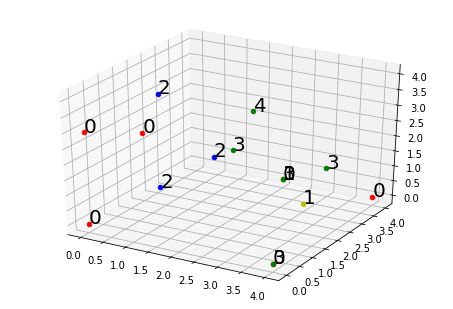

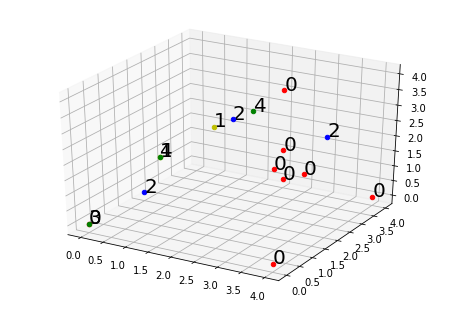

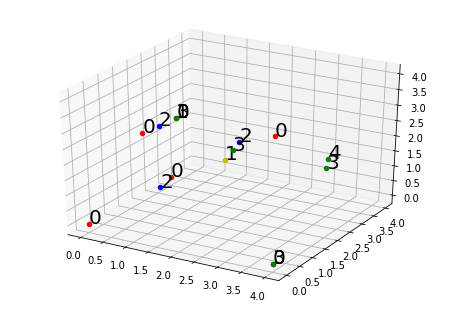

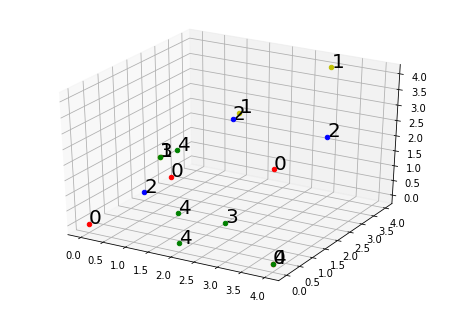

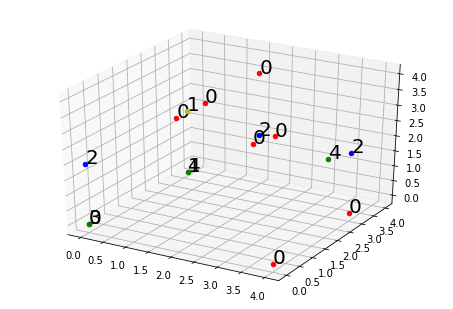

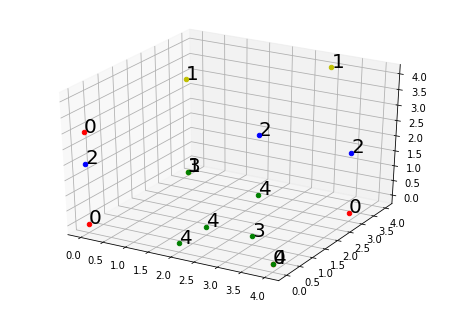

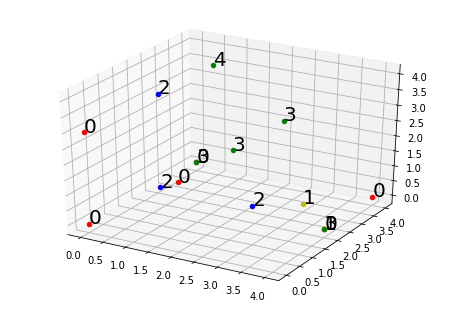

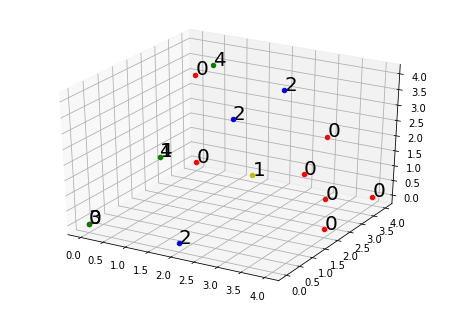

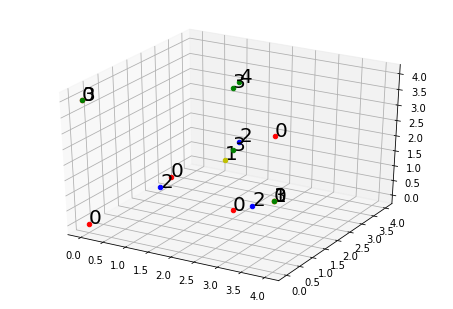

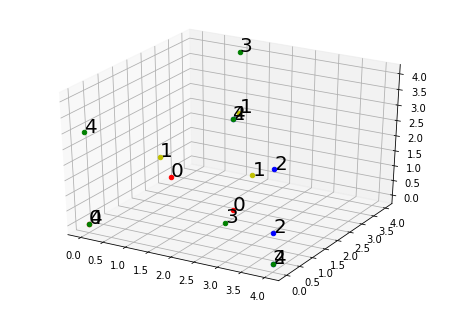

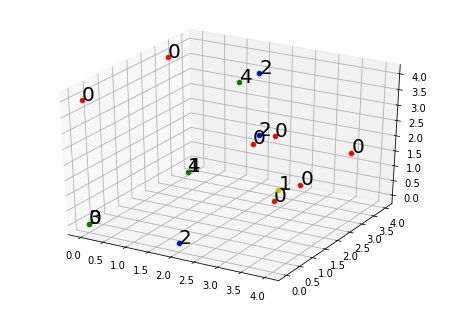

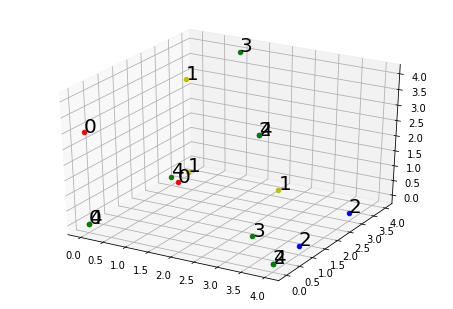

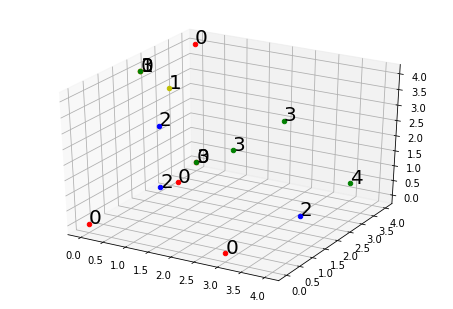

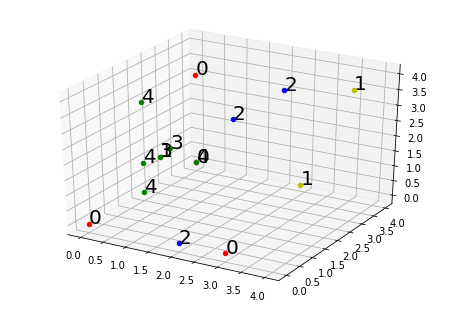

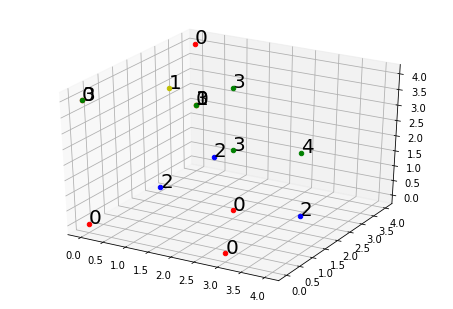

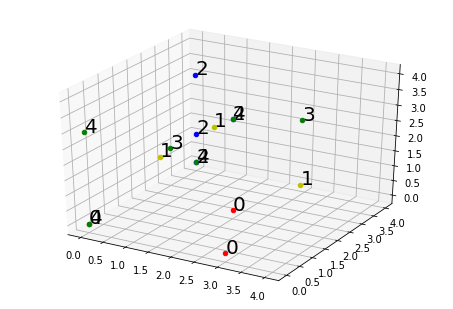

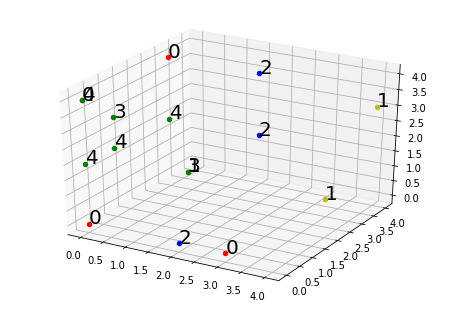

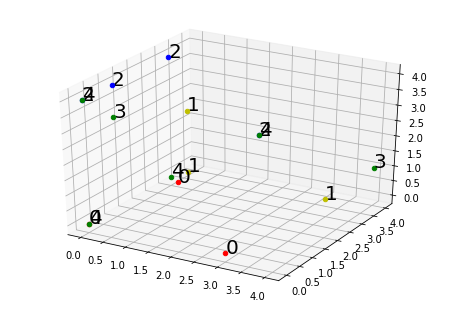

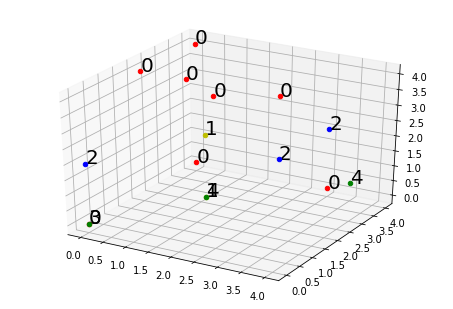

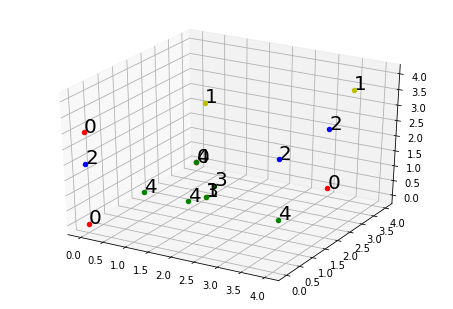

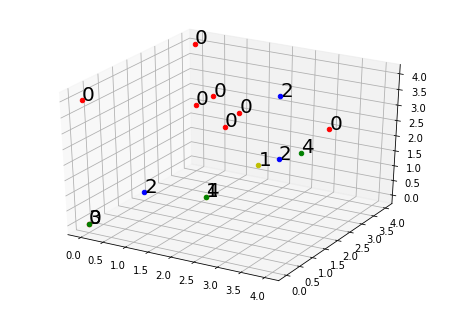

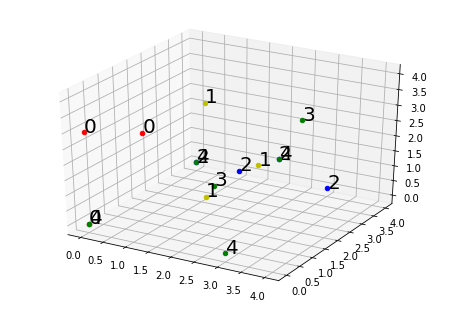

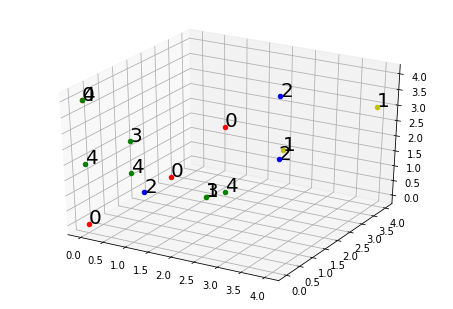

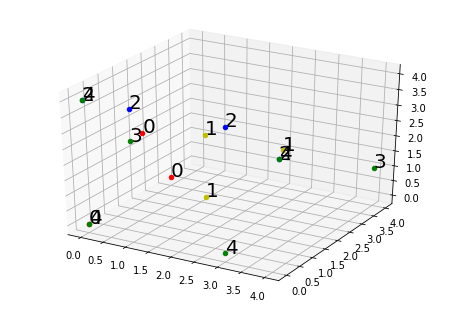

In [41]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random
for row in info:
    data = info[row]
    x = []
    y = []
    z = []
    c = []
    for r in data:
        x.append(r[0])
        y.append(r[1])
        z.append(r[2])
        c.append(r[3])
    fig = pyplot.figure()
    ax = Axes3D(fig)

    colors = ["r","y","b","g","g"]
    for k in range(len(x)):
        ax.scatter(x[k],y[k],z[k],c=colors[c[k]])
        ax.text(x[k],y[k],z[k],c[k], size=20)
    pyplot.show()

In [3]:
def distan(k,l):
    kaugus = 0
    for t in range(len(k)):
        if k[t] != l[t]:
            kaugus+=1
    return(kaugus)
nimed = ['G{}'.format(i) for i in range(1, 17)]
r = comb(1,2,3,4)

In [68]:
nimed =[]
for a in r:
    ni = r[a]
    ni = [w.replace('Hong Kong SAR, China', 'Hong Kong') for w in ni]
    ni = [w.replace('Korea, Rep.','Korea',) for w in ni]
    ni = [w.replace('Russian Federation', 'Russia') for w in ni]
    ni = [w.replace('Macao SAR, China', 'Macao') for w in ni]

    for a in ni:
        if len(a) >=10:
            print(a)
    nimed.append("\n".join(ni))
D_leaf_colors = {}
for row in nimed:
    D_leaf_colors[row] = "#B061FF"

    

Netherlands
New Zealand
Switzerland
Slovak Republic
Luxembourg
Montenegro
United Kingdom
Czech Republic


In [70]:
dflt_col = "#E84A5F"
D_leaf_colors = {"attr_1": dflt_col,

                 "attr_4": dflt_col, # Cluster 1 indigo
                 "attr_5": dflt_col,
                 "attr_2": dflt_col,
                 "attr_8": dflt_col,
                 "attr_6": dflt_col,
                 "attr_7": "#B061FF",

                 "attr_0": "#61ffff", # Cluster 2 cyan
                 "attr_3": "#61ffff",
                 "attr_9": "#61ffff",
                 "attr_10": "#61ffff",
                 "attr_11": "#61ffff",
                 "attr_12": "#61ffff",
                 "attr_13": "#61ffff",
                 "attr_14": "#61ffff",
                 "attr_15": "#61ffff",
                 "attr_16": "#61ffff",
                 }



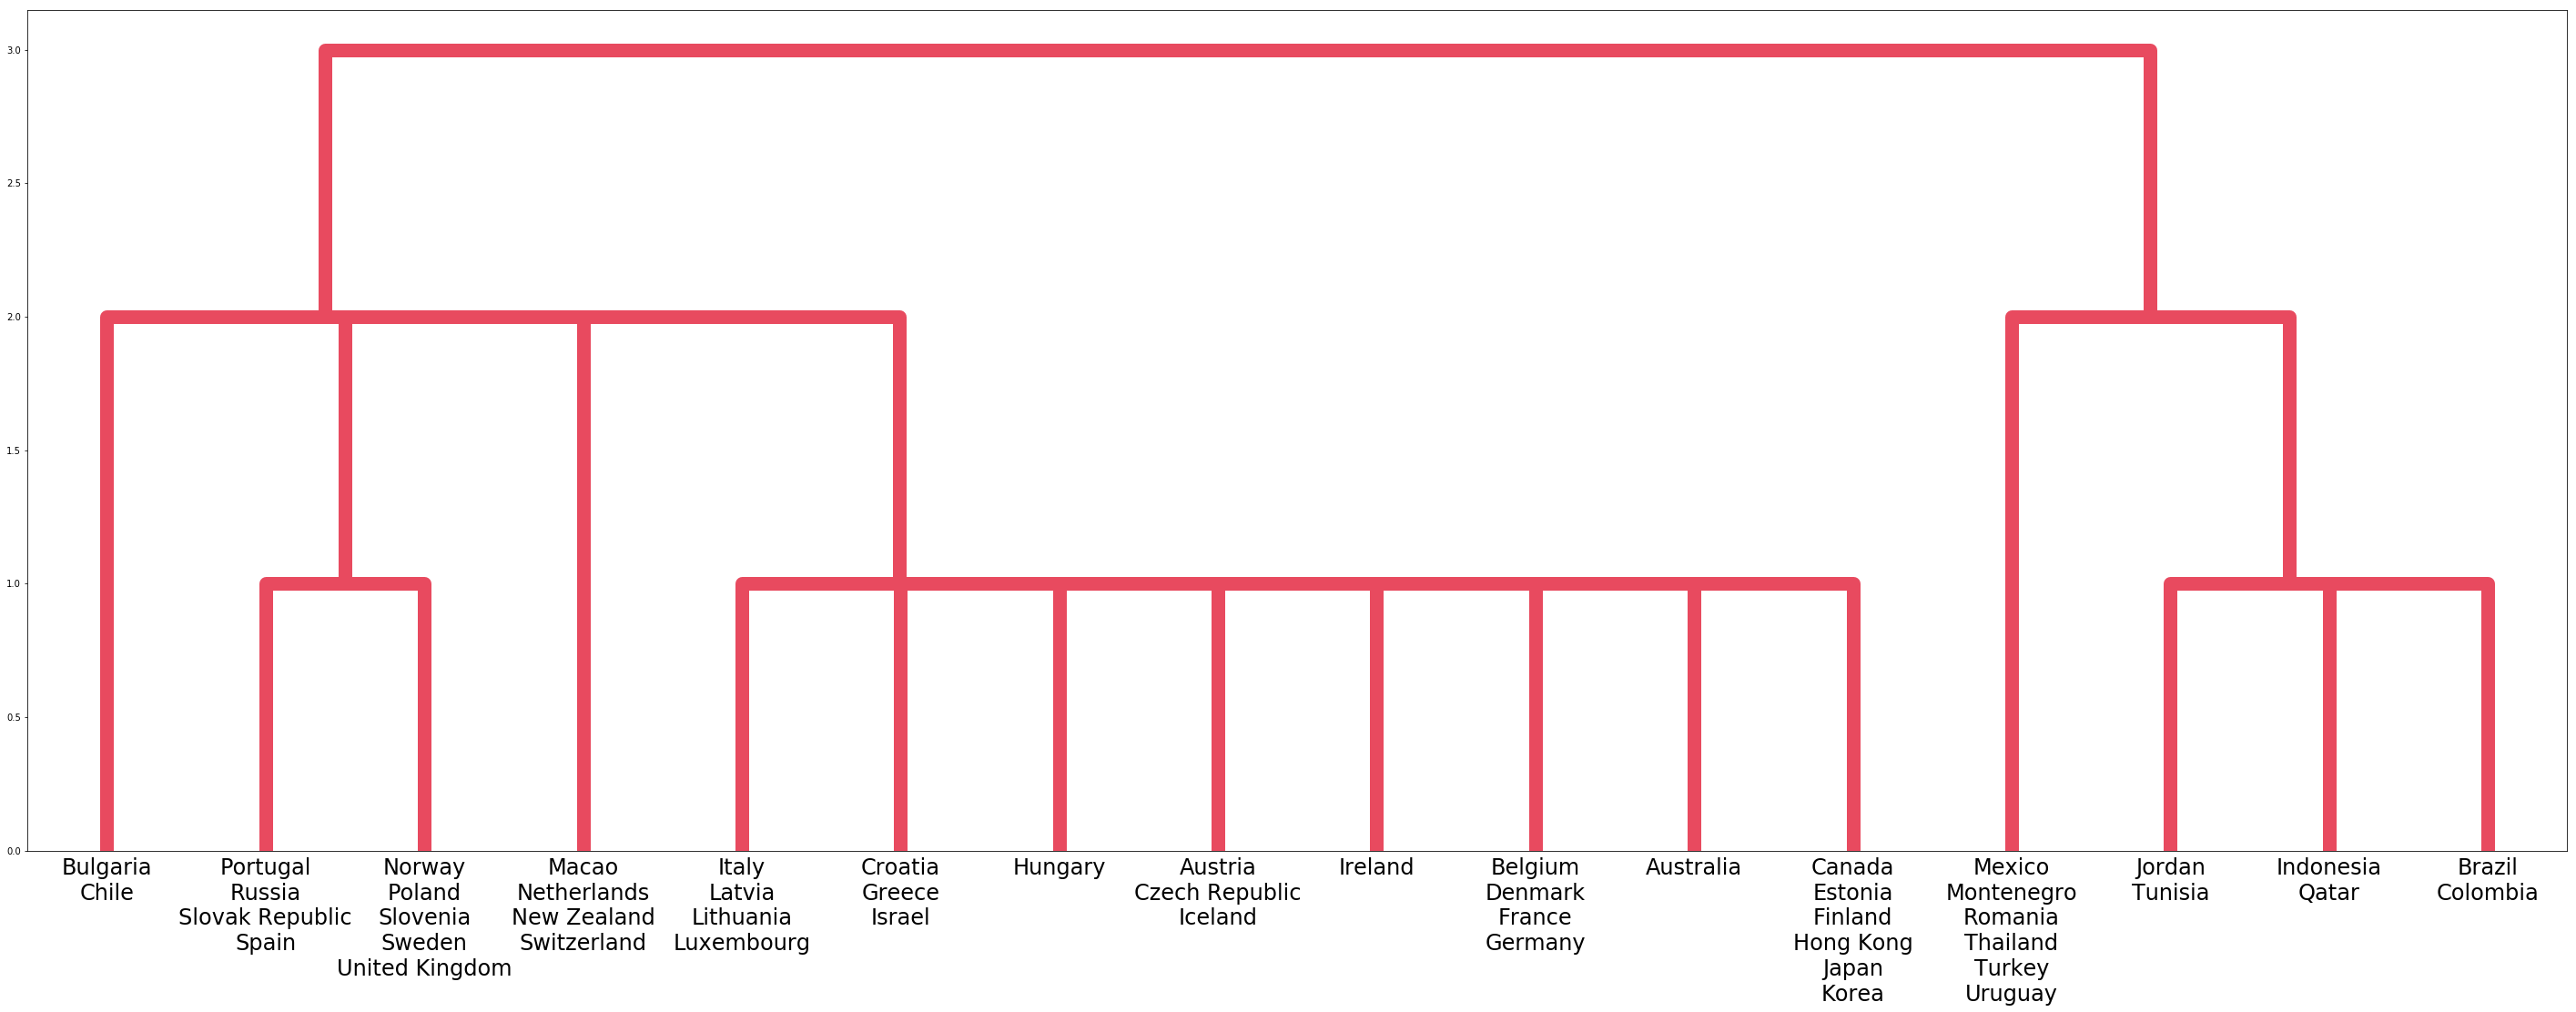

In [72]:
from matplotlib import pyplot as plt
import matplotlib as mpl

from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from matplotlib.pyplot import cm
from scipy.cluster import hierarchy

#Z = linkage(X, 'ward')
X = []
for t in r:
    X.append(list(t))
Z = linkage(X,method = 'single',metric = distan)

link_cols = {}
for i, i12 in enumerate(Z[:,:2].astype(int)):
    c1, c2 = (link_cols[x] if x > len(Z) else D_leaf_colors["attr_%d"%x] for x in i12)
    link_cols[i+1+len(Z)] = c1 if c1 == c2 else dflt_col
    
plt.figure(figsize=(50, 17))
    
plt.rcParams['lines.linewidth'] = 15

    
#plt.title('Four clusters visualisation')
#plt.xlabel('Countries')
#plt.ylabel('Distance')
dendrogram(
    Z,
    labels = nimed,
    link_color_func=lambda x: link_cols[x],
    #leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=24.,  # font size for the x axis labels
)
plt.show()



In [67]:
for a in nimed:
    k = a.split("\n")
    print("\t".join(k))

Australia
Canada	Estonia	Finland	Hong Kong	Japan	Korea
Macao	Netherlands	New Zealand	Switzerland
Indonesia	Qatar
Jordan	Tunisia
Brazil	Colombia
Portugal	Russia	Slovak Republic	Spain
Hungary
Croatia	Greece	Israel
Italy	Latvia	Lithuania	Luxembourg
Mexico	Montenegro	Romania	Thailand	Turkey	Uruguay
Bulgaria	Chile
Belgium	Denmark	France	Germany
Ireland
Norway	Poland	Slovenia	Sweden	United Kingdom
Austria	Czech Republic	Iceland


In [23]:
counter = 1
for row in r:
    print("G"+str(counter),end = "\t")
    for k in list(row):
        print(k,end="\t")
    print(r[row])
    counter+=1

G1	0	0	0	0	['Australia']
G2	0	0	3	0	['Canada', 'Estonia', 'Finland', 'Hong Kong SAR, China', 'Japan', 'Korea, Rep.']
G3	0	2	2	0	['Macao SAR, China', 'Netherlands', 'New Zealand', 'Switzerland']
G4	1	1	1	2	['Indonesia', 'Qatar']
G5	1	1	4	2	['Jordan', 'Tunisia']
G6	1	3	1	2	['Brazil', 'Colombia']
G7	2	2	2	3	['Portugal', 'Russian Federation', 'Slovak Republic', 'Spain']
G8	2	4	0	0	['Hungary']
G9	2	4	0	1	['Croatia', 'Greece', 'Israel']
G10	2	4	0	3	['Italy', 'Latvia', 'Lithuania', 'Luxembourg']
G11	3	1	4	4	['Mexico', 'Montenegro', 'Romania', 'Thailand', 'Turkey', 'Uruguay']
G12	3	3	0	1	['Bulgaria', 'Chile']
G13	4	0	0	0	['Belgium', 'Denmark', 'France', 'Germany']
G14	4	0	0	3	['Ireland']
G15	4	2	2	3	['Norway', 'Poland', 'Slovenia', 'Sweden', 'United Kingdom']
G16	4	4	0	0	['Austria', 'Czech Republic', 'Iceland']
